In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [33]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [34]:
dataset.shape

(14, 5)

In [35]:
campos = dataset.groupby(['Aparencia']).size()
campos

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

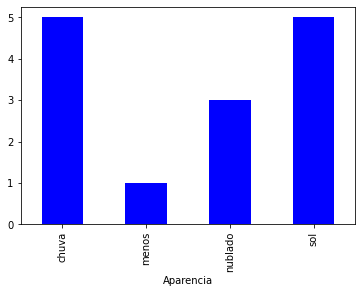

In [36]:
campos.plot.bar(color ='blue')

In [37]:
dataset['Aparencia'].describe()

count        14
unique        4
top       chuva
freq          5
Name: Aparencia, dtype: object

In [38]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "chuva"
campo = dataset.groupby(['Aparencia']).size()
campo

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [39]:
campos = dataset.groupby(['Temperatura']).size()
campos

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

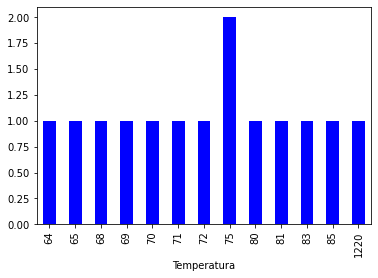

In [40]:
campos.plot.bar(color ='blue')

In [41]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [43]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [45]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [47]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura' ] = mediana
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [48]:
campos = dataset.groupby(['Umidade']).size()
campos

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [49]:
dataset.loc[(dataset['Umidade'] <= 0) | (dataset['Umidade'] >= 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [50]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [53]:
dataset.loc[(dataset['Umidade'] <= 0) | (dataset['Umidade'] >= 100), 'Umidade'] = mediana
dataset.loc[(dataset['Umidade'] <= 0) | (dataset['Umidade'] >= 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [54]:
campos = dataset.groupby(['Jogar']).size()
campos

Jogar
nao    5
sim    9
dtype: int64

In [75]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [60]:
dataset['Umidade'].fillna(mediana, inplace=True)

In [62]:
campos = dataset.groupby(['Vento']).size()
campos

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [74]:
dataset['Vento'].fillna(True, inplace=True)

In [72]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [73]:
dataset.shape

(14, 5)